In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
import math
from sklearn.tree import DecisionTreeRegressor

In [295]:
house_df = pd.read_excel('house_prices_data.xlsx') # Importing csv file into pandas data frame

In [296]:
house_df_copy = copy.deepcopy(house_df)

In [297]:
# Taking a look at the data
house_df.head()

,Year,Median,Average,# Sold,Interest,GDP ( Billions of US $),Per Capita (US $),GDP Growth (%),UNEMPLOYMENT RATE (DECEMBER),"INFLATION (DECEMBER, YOY)",Population
0,1971,25200,28300,656,7.541750,1164.850,5609.3826,3.2934,0.060,-1.55,202907917
1,1972,27600,30500,718,7.383269,1279.110,6094.0180,5.2589,0.052,-1.02,205238390
2,1973,32500,35500,634,8.044808,1425.376,6726.3590,5.6457,0.049,2.91,207314764
3,1974,35900,38900,519,9.187115,1545.243,7225.6914,-0.5406,0.072,4.88,209277968
4,1975,39300,42600,549,9.047115,1684.904,7801.4567,-0.2055,0.082,-1.91,211274535


In [298]:
# Checking to see the variables which are most correlated
house_df.corr()

,Year,Median,Average,# Sold,Interest,GDP ( Billions of US $),Per Capita (US $),GDP Growth (%),UNEMPLOYMENT RATE (DECEMBER),"INFLATION (DECEMBER, YOY)",Population
Year,1.000000,0.980340,0.982707,0.020483,-0.777205,0.984630,0.994425,-0.242404,-0.298264,0.049912,0.998541
Median,0.980340,1.000000,0.998743,0.054260,-0.785561,0.993374,0.992834,-0.211206,-0.362725,0.099461,0.978922
Average,0.982707,0.998743,1.000000,0.065334,-0.781174,0.991584,0.993438,-0.216093,-0.358015,0.091899,0.981798
# Sold,0.020483,0.054260,0.065334,1.000000,-0.098418,-0.006199,0.017761,0.345883,-0.577033,0.133086,0.025477
Interest,-0.777205,-0.785561,-0.781174,-0.098418,1.000000,-0.807386,-0.795079,0.116391,0.409921,-0.174139,-0.795610
GDP ( Billions of US $),0.984630,0.993374,0.991584,-0.006199,-0.807386,1.000000,0.996906,-0.237267,-0.318313,0.080199,0.986116
Per Capita (US $),0.994425,0.992834,0.993438,0.017761,-0.795079,0.996906,1.000000,-0.231419,-0.322976,0.072005,0.994512
GDP Growth (%),-0.242404,-0.211206,-0.216093,0.345883,0.116391,-0.237267,-0.231419,1.000000,-0.456649,0.216466,-0.246654
UNEMPLOYMENT RATE (DECEMBER),-0.298264,-0.362725,-0.358015,-0.577033,0.409921,-0.318313,-0.322976,-0.456649,1.000000,-0.408175,-0.299873
"INFLATION (DECEMBER, YOY)",0.049912,0.099461,0.091899,0.133086,-0.174139,0.080199,0.072005,0.216466,-0.408175,1.000000,0.050178


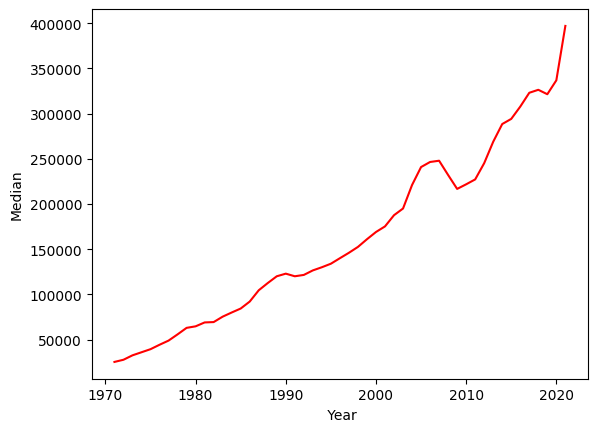

In [299]:
plt.plot(house_df_copy[' Year'],house_df_copy['Median'], color='red')
plt.xlabel(' Year')
plt.ylabel('Median')
plt.show()

In [300]:
house_df.columns.tolist() # The column names have some spaces. e.g ' Year'

[' Year',
 'Median',
 'Average',
 '# Sold',
 'Interest',
 ' GDP ( Billions of US $)',
 ' Per Capita (US $)',
 'GDP Growth (%)',
 'UNEMPLOYMENT RATE (DECEMBER)',
 'INFLATION (DECEMBER, YOY)',
 'Population']

In [301]:
house_df.columns = [col.strip() for col in house_df.columns] # Removing spaces in column names
house_df_copy.columns = [col.strip() for col in house_df_copy.columns] # Removing spaces in column names

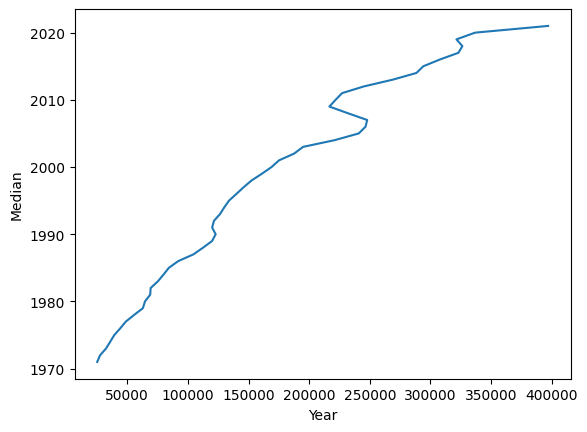

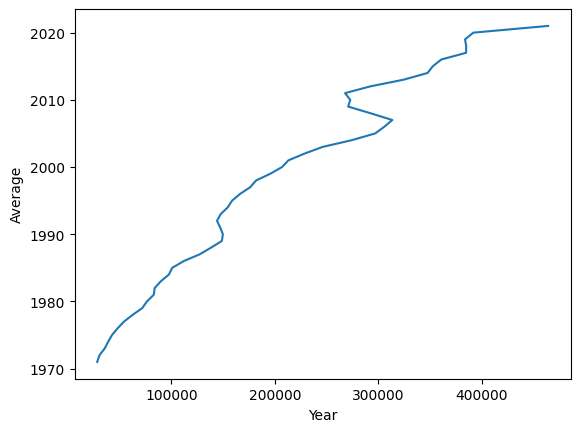

In [302]:
# Average and Median seem very correlated, which statistically make sense.
# Let's plot that to check
for variable in ['Median','Average']:
  plt.plot(house_df[variable], house_df['Year'])
  plt.ylabel(variable)
  plt.xlabel("Year")
  plt.show()

In [303]:
# Since the median and average are almost identical,
# we can drop the average column, because the median is a 
# better measure of the mid point of a distribution
house_df = house_df.drop('Average', axis = 1)

**Now let's check if other variables vary with each other using a pairplot.**

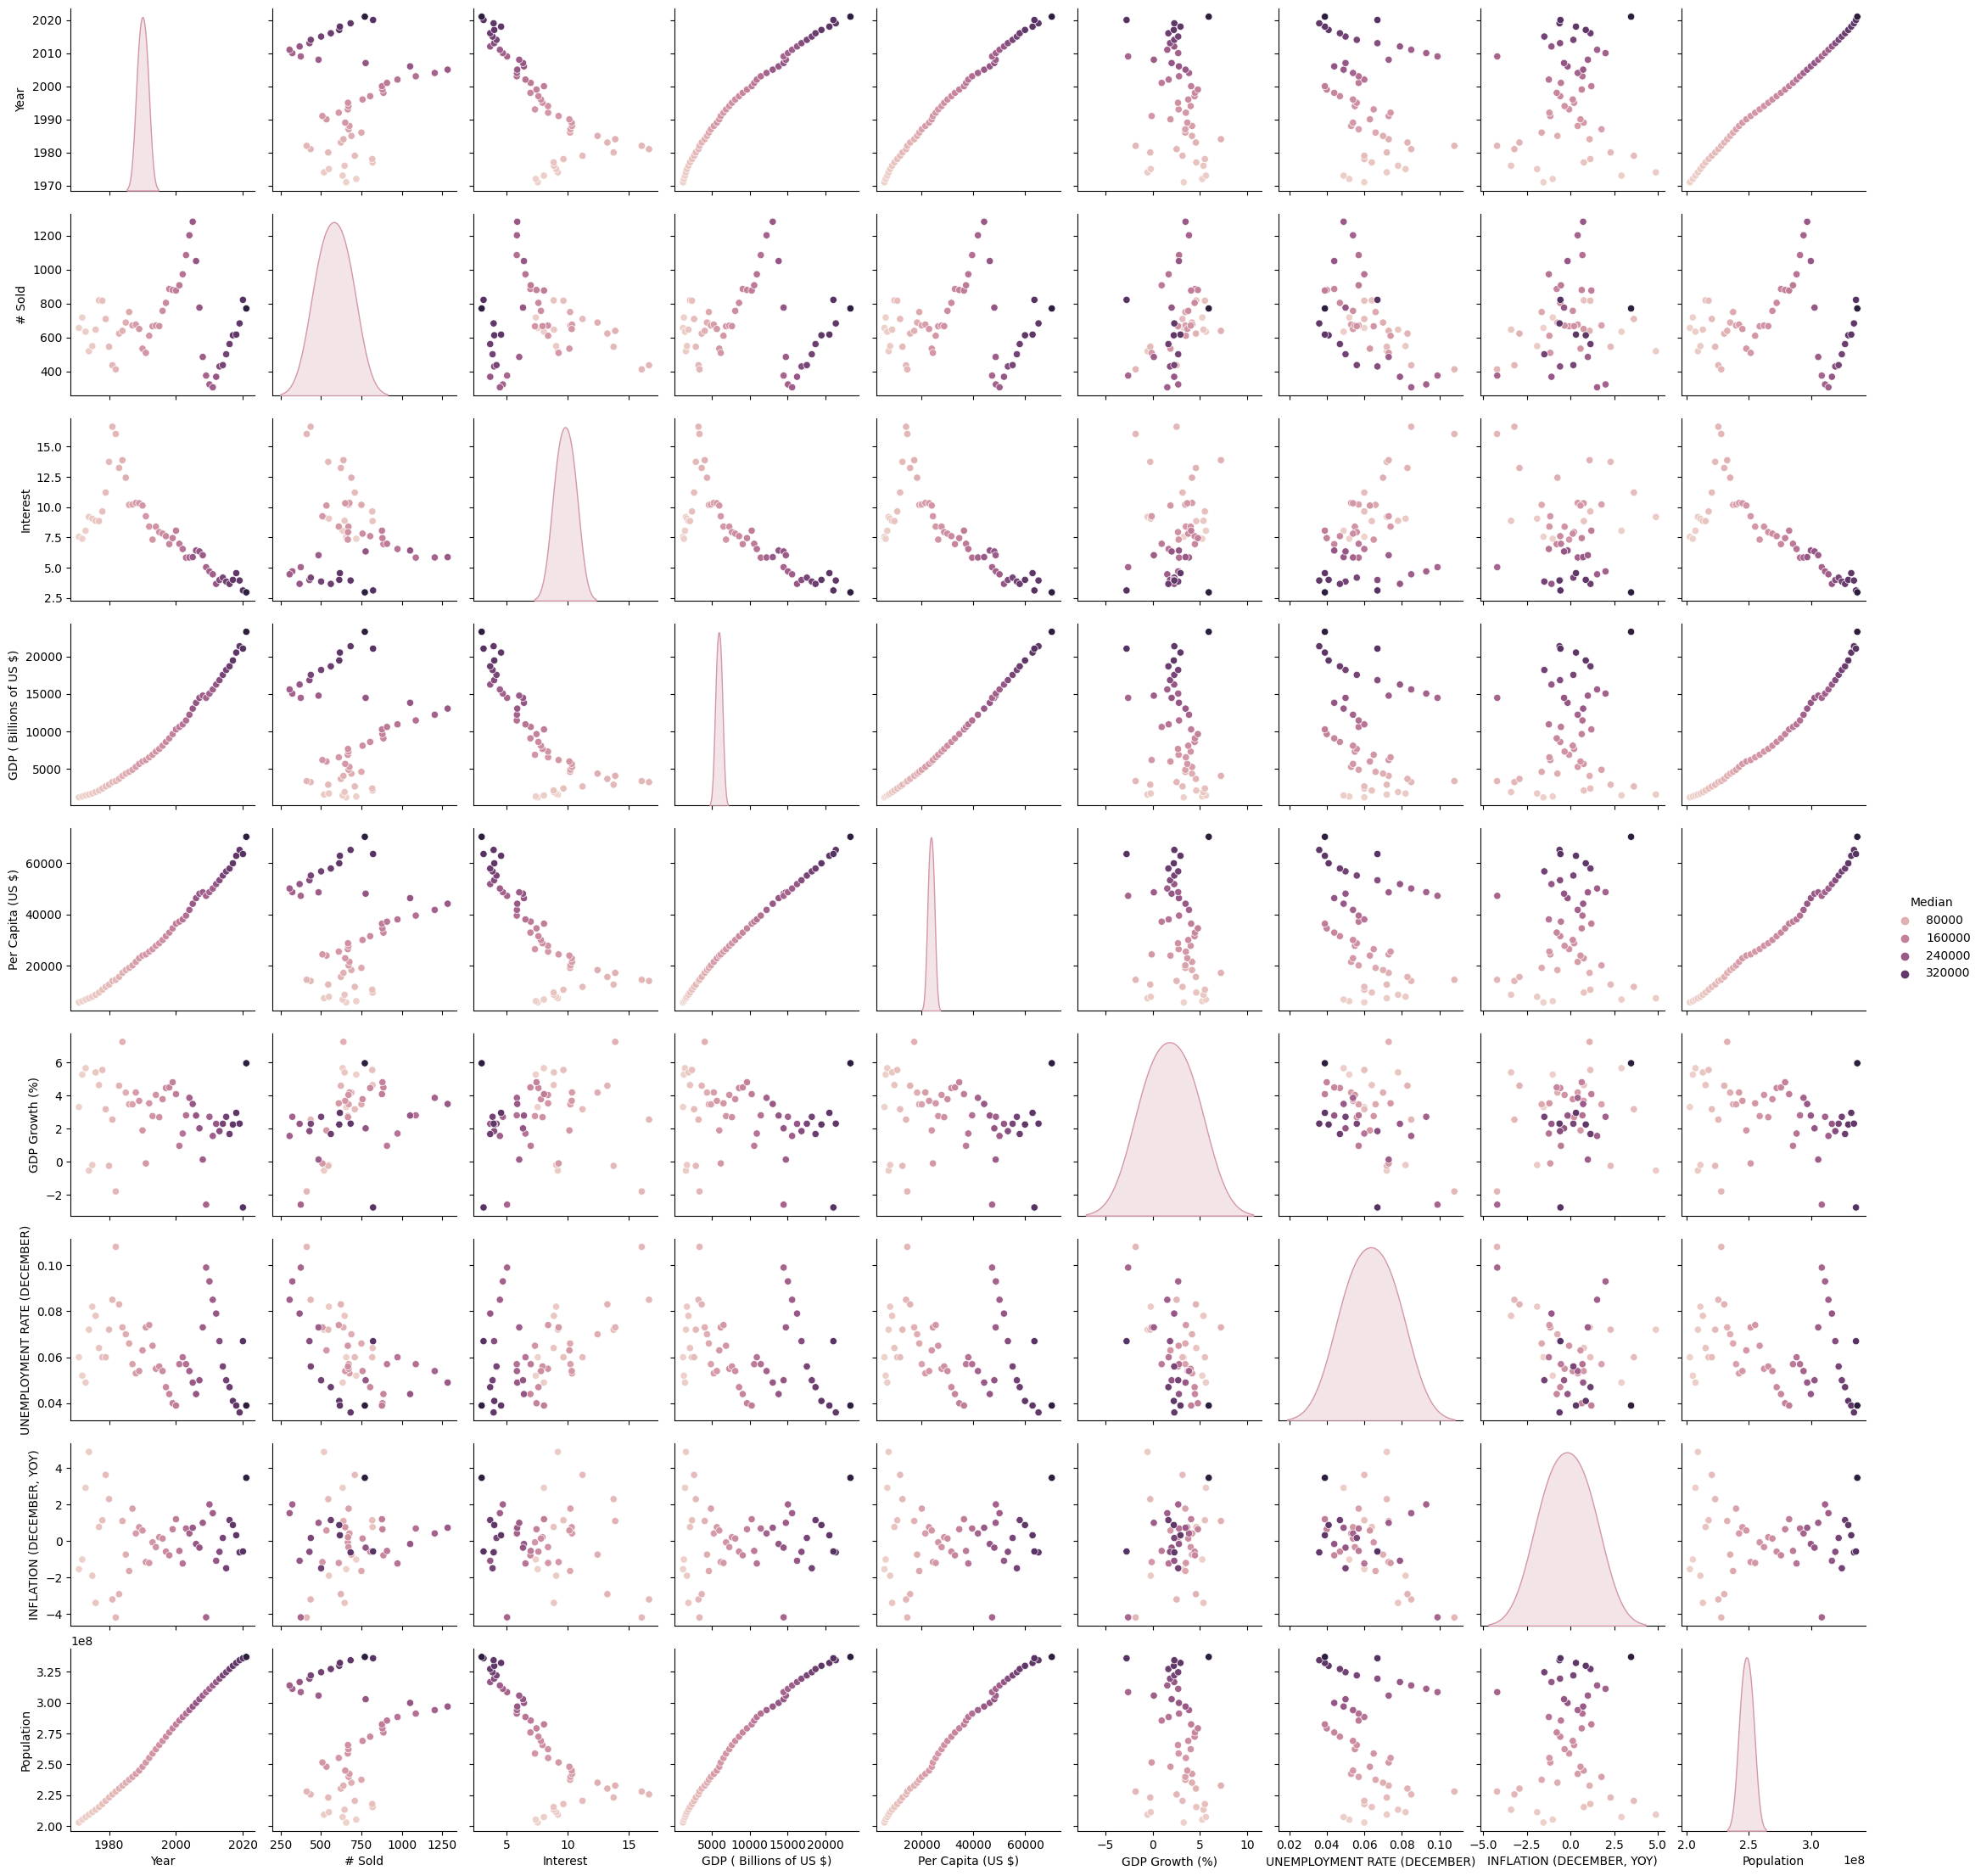

In [304]:
sns.pairplot(house_df, hue="Median")

**The pairplot shows that population, GDP, and per capita vary together. So one might even think that eliminating one of them, population for example, will not signficantly change the results. However, if you do that, there will be a huge difference in the outcome. As for other variables, there do not seem to be a clear covariance, if not for the interest rate which negative correlate with the GDP, Population, and Per Capita**

***Findingthe top variables correlated to Median house Price***

In [305]:
median_correlations = house_df.corrwith(house_df['Median'])
corr_series = median_correlations.abs().nlargest(6)[1:]
print('Most influencing factors median price of houses in the US:')
top_variables = corr_series.index.tolist()
for index in corr_series.index:
  print(f'{index}: {round(median_correlations.loc[index],2)}')


Most influencing factors median price of houses in the US:
GDP ( Billions of US $): 0.99
Per Capita (US $): 0.99
Year: 0.98
Population: 0.98
Interest: -0.79


In [306]:
# Split our data into training and testing datasets

xtrain, xtest, ytrain, ytrue = train_test_split(house_df.drop('Median', axis = 1), house_df["Median"], test_size = 0.1, random_state=37)

***Doing Linear Regression on each of the most correlated variable***

In [307]:
lr_coefs = []
for variable in top_variables:
  lr_coefs.append(np.polyfit(xtrain.loc[:, variable], ytrain, 1))

In [308]:
ranges = list(map(lambda column: house_df[column].max() - house_df[column].min(), top_variables)) # ranges of different variables
min_maxes = list(map(lambda column: (house_df[column].min(), house_df[column].max()), top_variables)) # (min, max) tuple of different variables

In [309]:
potential_variable_values = [np.linspace(min_maxes[i][0] - 0.2 * ranges[i], min_maxes[i][1] + 0.2 * ranges[i],1000) for i in range(len(ranges))]
predicted_values = [lr_coefs[i][0] * potential_variable_values[i] + lr_coefs[i][1] for i in range(len(top_variables))]

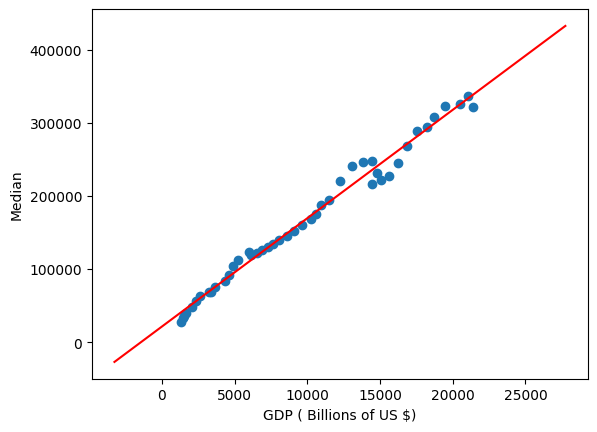

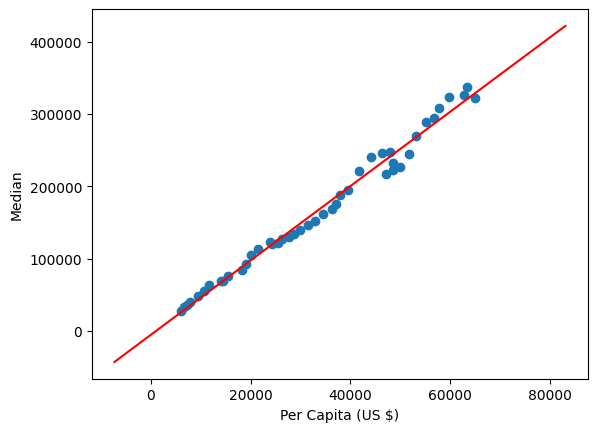

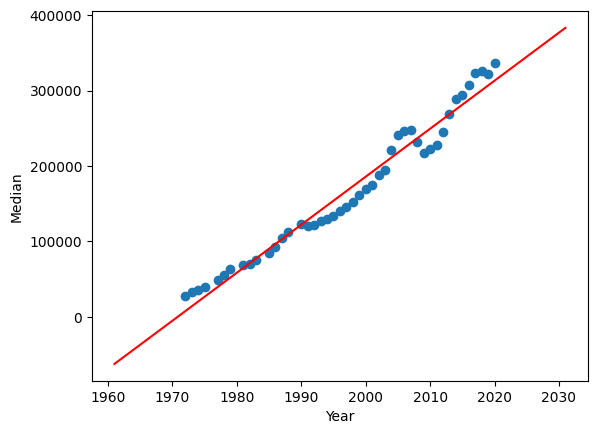

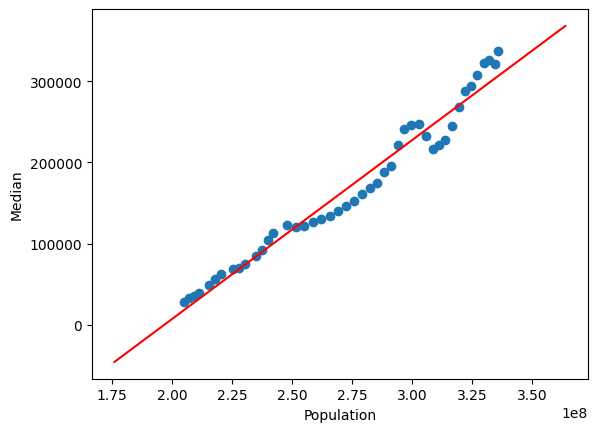

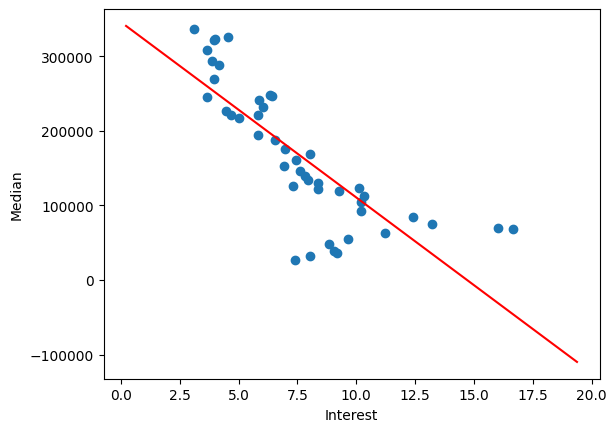

In [310]:
# Plotting the data points along with the regression lines for each variable
for index, variable in enumerate(top_variables):
    #plt.scatter(house_df_copy[variable],house_df_copy['Median'])
    plt.scatter(xtrain[variable],ytrain)
    plt.plot(potential_variable_values[index], predicted_values[index], color='red')
    plt.xlabel(variable)
    plt.ylabel('Median')
    plt.show()

***The fits above look good, especially for Per Capita. Now let's formally evaluate each regression using RMSE***

In [312]:
# Test predictions
test_predictions = [lr_coefs[i][0] * xtest[top_variables[i]] + lr_coefs[i][1] for i in range(len(top_variables))]

In [313]:
# Mean Squared Errors
MSE = [mean_squared_error(ytrue, test_predictions[i]) for i in range(len(top_variables))]


In [314]:
for i, variable in enumerate(top_variables):
  print(variable, ": ", round(math.sqrt(MSE[i]),-3))


GDP ( Billions of US $) :  15000.0
Per Capita (US $) :  18000.0
Year :  34000.0
Population :  37000.0
Interest :  91000.0


***Note that, even though GDP, Per Capita,Population, and Year have an almost perfect correlation with Median House Price, their RMSE differ quite a lot, meaning that correlation is not necessarily the best way to determine whether a variable is really good or not.***

**Given that RMSE may seem elusive, here are the test predictions followed by the true values**

In [281]:
ytrue

18    120000
13     79900
9      64600
0      25200
5      44200
50    397100
Name: Median, dtype: int64

In [282]:
test_predictions

[18    105064.508674
 13     81274.099788
 9      63767.528674
 0      38664.615676
 5      49174.170861
 50    367201.949637
 Name: GDP ( Billions of US $), dtype: float64,
 18    111951.875193
 13     82505.208138
 9      59165.077774
 0      23406.601622
 5      38719.832973
 50    355246.553026
 Name: Per Capita (US $), dtype: float64,
 18    115579.013433
 13     83739.224304
 9      58267.393001
 0        955.772569
 5      32795.561698
 50    319353.663857
 Name: Year, dtype: float64,
 18    106002.505358
 13     79100.644271
 9      57852.833704
 0      13195.016430
 5      36067.035093
 50    309167.917788
 Name: Population, dtype: float64,
 18    103267.809335
 13     19632.309113
 9      22818.983039
 0     168555.751921
 5     137433.405701
 50    276301.943476
 Name: Interest, dtype: float64]

**Now let's do the regression with all the variable at once and see whether it improves our result.**

In [315]:
model = LinearRegression()

In [316]:
model.fit(xtrain,ytrain)

LinearRegression()

In [317]:
test_predictions_multi = model.predict(xtest)

In [318]:
# Root Mean Squared Error when using all variables
RMSE_multi = mean_squared_error(ytrue, test_predictions_multi)
print("RMSE with all variables combined: ", round(math.sqrt(RMSE_multi),-3))

RMSE with all variables combined:  7000.0


***Linear Regression using all the variables gaves us a result with about 53% improvement compared to the GDP! This means that just by using USA's GDP, someone can predict the median house price with a fair accuracy and precision. But using all the variables improves the result by almost two-fold
Now note that, when you remove the population size from the data, the improvement drops from 53% to just 14%! Meanwhile Trying to predict the house prices using population alone will lead to very imprecise result. This reminds us of the idea of Boosting, where you use combination of weak models to produce a very good model.***

In [319]:
# create a Ridge regression object and fit the training data
ridge_reg = Ridge(alpha=0.37)
ridge_reg.fit(xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.01215e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.37)

In [320]:
# make predictions on the test data
ridge_pred = ridge_reg.predict(xtest)

In [321]:
# evaluate the performance of the models
ridge_mse = mean_squared_error(ytrue, ridge_pred)
print('Root Mean square error when using Ridge regression: ', round(math.sqrt(ridge_mse), -3))

Root Mean square error when using Ridge regression:  5000.0


***L2 normalization improving the test accuracy. It minimizes overfitting, reason why it gives a better result.***

***This modeling shows that we can accurately predict median prices of houses given data within $5000 of precision***